In [1]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("clean_car_price.csv") 
df2 = df

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5502 entries, 0 to 5501
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5502 non-null   int64  
 1   car_name             5502 non-null   object 
 2   car_prices_in_rupee  5502 non-null   float64
 3   kms_driven           5502 non-null   float64
 4   fuel_type            5502 non-null   object 
 5   transmission         5502 non-null   object 
 6   ownership            5502 non-null   int64  
 7   manufacture          5502 non-null   float64
 8   engine               5502 non-null   float64
 9   Seats                5502 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 430.0+ KB


Figure(1000x400)


<Axes: xlabel='manufacture'>

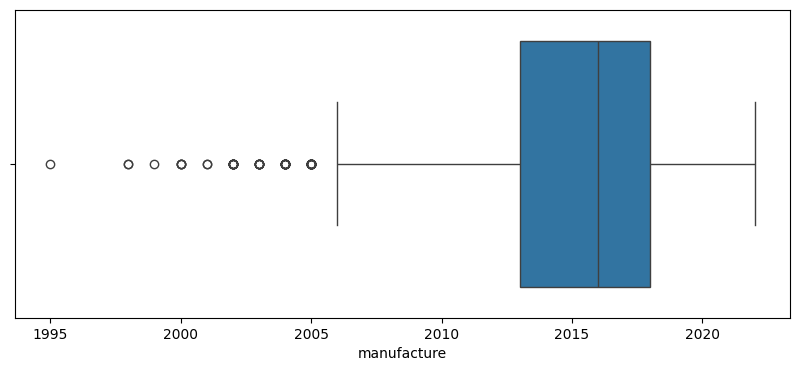

In [5]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "manufacture", data = df2) 

Figure(1000x400)


<Axes: xlabel='engine'>

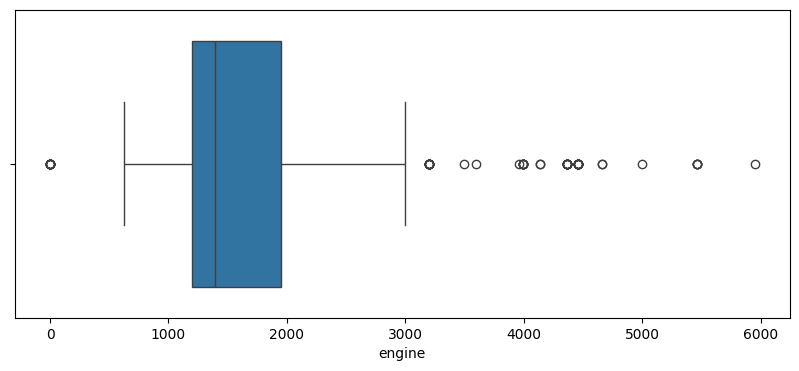

In [8]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "engine", data = df2)

In [9]:
percentile25 = df2['manufacture'].quantile(0.25)
percentile75 = df2['manufacture'].quantile(0.75)
iqr = percentile75 - percentile25

In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [14]:
df2[df2['manufacture'] > upper_limit]
df2[df2['manufacture'] < lower_limit]

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
150,158,Ford Endeavour 4x4 XLT,4.00,110000.0,Diesel,Manual,2,2005.0,2953.0,7.0
212,223,Maruti Wagon R LXI BSII,1.30,77000.0,Petrol,Manual,2,2005.0,998.0,5.0
239,251,Maruti Zen LX,1.00,90000.0,Petrol,Manual,3,2002.0,993.0,5.0
280,294,Maruti Zen LXI,4.00,132596.0,Petrol,Manual,2,2004.0,993.0,5.0
359,376,Maruti Zen VXI,1.10,90000.0,Petrol,Manual,3,1998.0,993.0,5.0
...,...,...,...,...,...,...,...,...,...,...
4623,4649,Tata Tiago XTA AMT,6.10,2640.0,Petrol,Automatic,1,2002.0,1298.0,5.0
4633,4659,Hyundai Getz GLS,1.10,40000.0,Petrol,Manual,2,2005.0,799.0,5.0
4831,4857,Maruti Wagon R VXI,1.00,59726.0,Petrol,Manual,1,2002.0,1248.0,5.0
5103,5129,Toyota Corolla H2,2.15,60000.0,Petrol,Manual,2,2005.0,1298.0,5.0


In [16]:
new_df = df2[df2['manufacture'] > lower_limit]
new_df.shape

(5426, 10)

C:\Users\ANIRUDDHA\AppData\Local\Temp\ipykernel_1668\2779168072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['manufacture'])
C:\Users\ANIRUDDHA\AppData\Local\Temp\ipykernel_1668\2779168072.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['manufacture'])


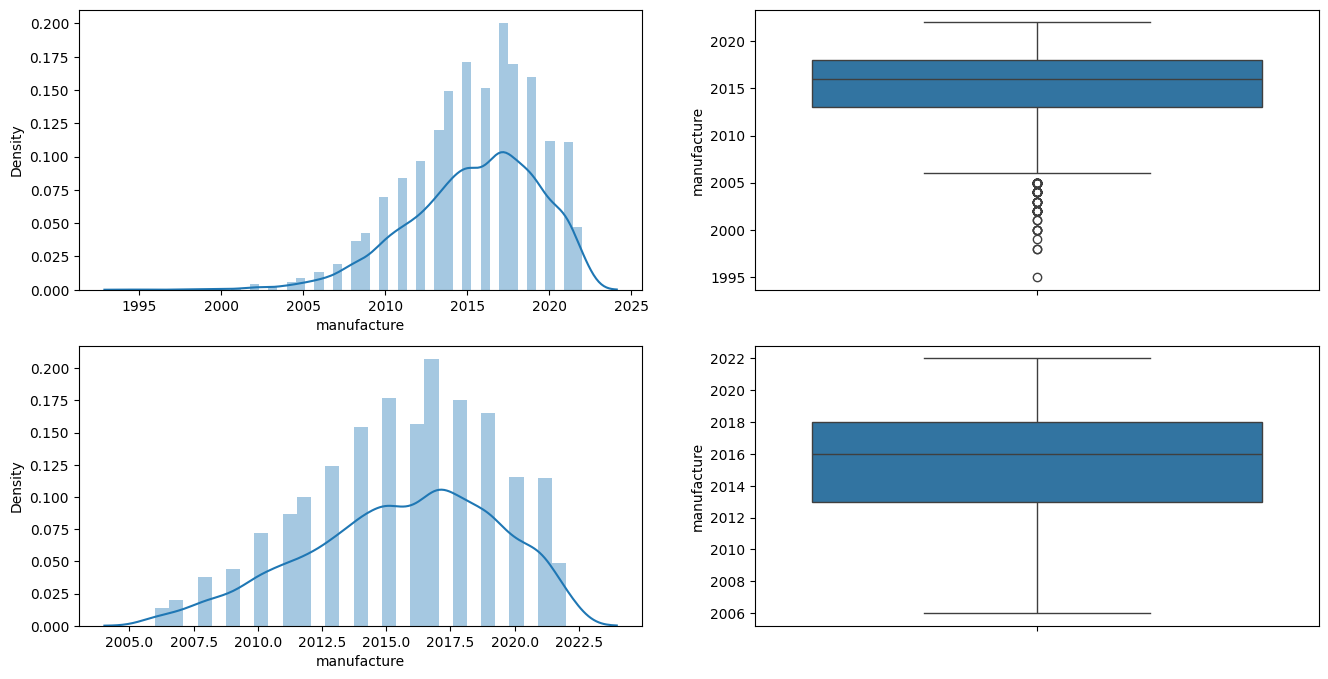

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['manufacture'])
plt.subplot(2,2,2)
sns.boxplot(df2['manufacture'])
plt.subplot(2,2,3)
sns.distplot(new_df['manufacture'])
plt.subplot(2,2,4)
sns.boxplot(new_df['manufacture'])
plt.show()

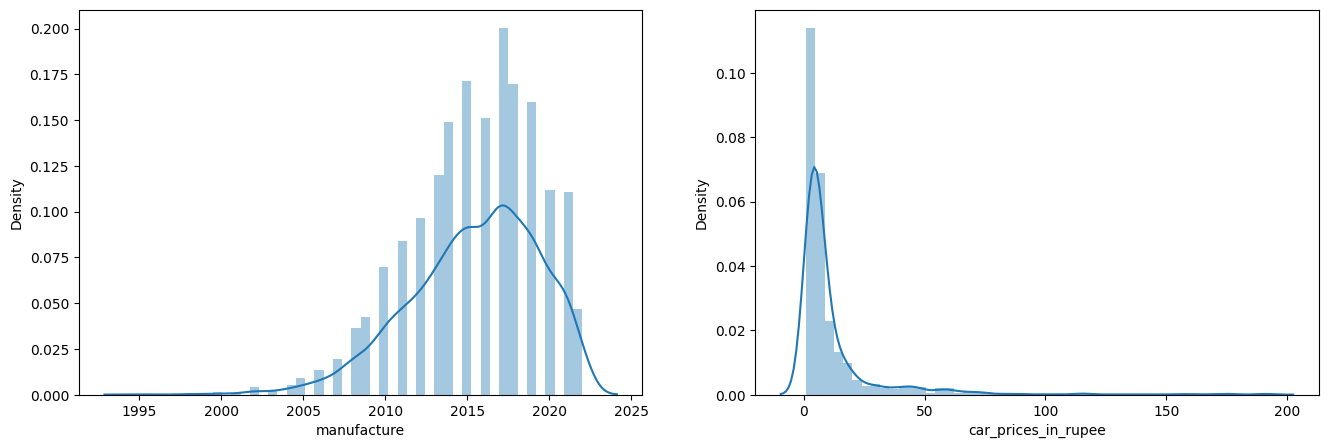

In [18]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['manufacture'])
plt.subplot(1,2,2)
sns.distplot(df2['car_prices_in_rupee'])
plt.show()

In [21]:
print("Highest allowed",df2['manufacture'].mean() + 3*df2['manufacture'].std())
print("Lowest allowed",df2['manufacture'].mean() - 3*df2['manufacture'].std())

Highest allowed 2027.2485455175943
Lowest allowed 2003.6634864707735


In [22]:
df2[(df2['manufacture'] > 2027.24) | (df2['manufacture'] < 2003.66)]

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
239,251,Maruti Zen LX,1.00,90000.0,Petrol,Manual,3,2002.0,993.0,5.0
359,376,Maruti Zen VXI,1.10,90000.0,Petrol,Manual,3,1998.0,993.0,5.0
451,469,Maruti Wagon R LXI,1.40,90000.0,Petrol,Manual,2,2003.0,998.0,5.0
472,490,Mahindra Jeep CL 500 MDI,2.60,100000.0,Diesel,Manual,1,1995.0,1199.0,6.0
895,919,Mahindra Scorpio 2.6 SLX CRDe,1.80,120000.0,Diesel,Manual,3,2002.0,2143.0,5.0
930,954,Maruti 800 Std MPFi,1.00,80000.0,Petrol,Manual,2,2003.0,1599.0,5.0
934,958,Maruti 800 DX 5 Speed,1.00,30000.0,Petrol,Manual,1,2002.0,796.0,7.0
936,960,Maruti 800 Std,1.00,50000.0,Petrol,Manual,4,2000.0,1197.0,7.0
946,970,Maruti Zen LXI,1.00,100000.0,Petrol,Manual,2,2000.0,1396.0,5.0
1679,1703,Fiat Palio 1.2 ELX,1.00,20000.0,Petrol,Manual,1,2002.0,796.0,5.0


In [26]:
new_df2 = df2[(df2['manufacture'] < 2027.24) & (df2['manufacture'] > 2003.66)]
new_df2

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1,2017.0,1956.0,5.0
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,Petrol,Automatic,1,2021.0,1330.0,5.0
2,2,Toyota Camry 2.5 G,16.40,60343.0,Petrol,Automatic,1,2016.0,2494.0,5.0
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,Petrol,Manual,1,2016.0,1199.0,5.0
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,Petrol,Automatic,1,2017.0,1197.0,5.0
...,...,...,...,...,...,...,...,...,...,...
5497,5525,BMW X1 sDrive 20d xLine,28.90,45000.0,Diesel,Automatic,1,2018.0,2995.0,7.0
5498,5526,BMW M Series M4 Coupe,64.90,29000.0,Petrol,Automatic,2,2015.0,1968.0,5.0
5499,5527,Jaguar XF 2.2 Litre Luxury,13.75,90000.0,Diesel,Automatic,2,2013.0,2755.0,5.0
5500,5528,BMW 7 Series 730Ld,29.90,79000.0,Diesel,Automatic,3,2015.0,2967.0,6.0


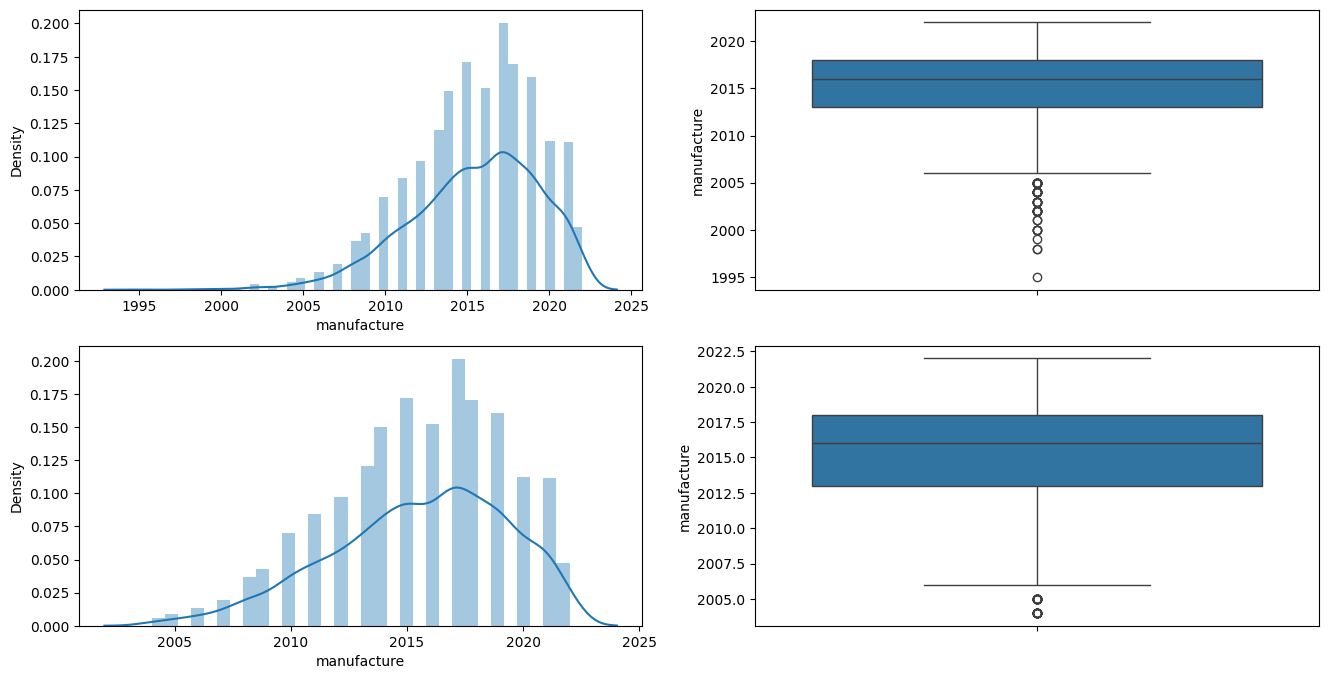

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['manufacture'])
plt.subplot(2,2,2)
sns.boxplot(df2['manufacture'])
plt.subplot(2,2,3)
sns.distplot(new_df2['manufacture'])
plt.subplot(2,2,4)
sns.boxplot(new_df2['manufacture'])
plt.show()